# Innovaccer HackerCamp 2019 Problem 2


In [1]:
#libraries 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA

/home/sharwan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#read data
df = pd.read_excel('Potential datasets for recruitment.xlsx', sheet_name='Dataset 2')
df.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)",4 for malignant)
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN


In [44]:
df.drop(df.columns[11], axis = 1, inplace = True) #drop '4 for malignant column'
df.head(3)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [4]:
list(df.shape)[0]
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class: (2 for benign,  4 for malignant)',
       ' 4 for malignant)'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number                         699 non-null int64
Clump Thickness                            699 non-null int64
Uniformity of Cell Size                    699 non-null int64
Uniformity of Cell Shape                   699 non-null int64
Marginal Adhesion                          699 non-null int64
Single Epithelial Cell Size                699 non-null int64
Bare Nuclei                                699 non-null object
Bland Chromatin                            699 non-null int64
Normal Nucleoli                            699 non-null int64
Mitoses                                    699 non-null int64
Class: (2 for benign,  4 for malignant)    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [47]:
#for maligant give is 4 converted in 1 and similer for bengin is 0
diag_map = {4:1, 2:0}
df['Class: (2 for benign,  4 for malignant)'] = df['Class: (2 for benign,  4 for malignant)'].map(diag_map)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [48]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce').fillna(0).astype(int) #remove '?'
X = df.iloc[:, 1:10].values #removed simple code number 
y = df.iloc[:, 10].values

Text(0.5,1,'count of bengin and malignant')

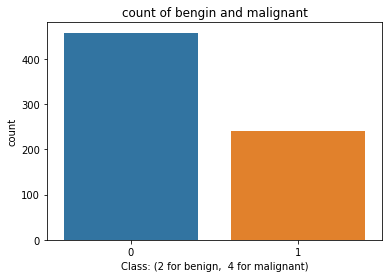

In [71]:
ax = sns.countplot(df['Class: (2 for benign,  4 for malignant)'],label="Count")
ax.set_title('count of bengin and malignant')

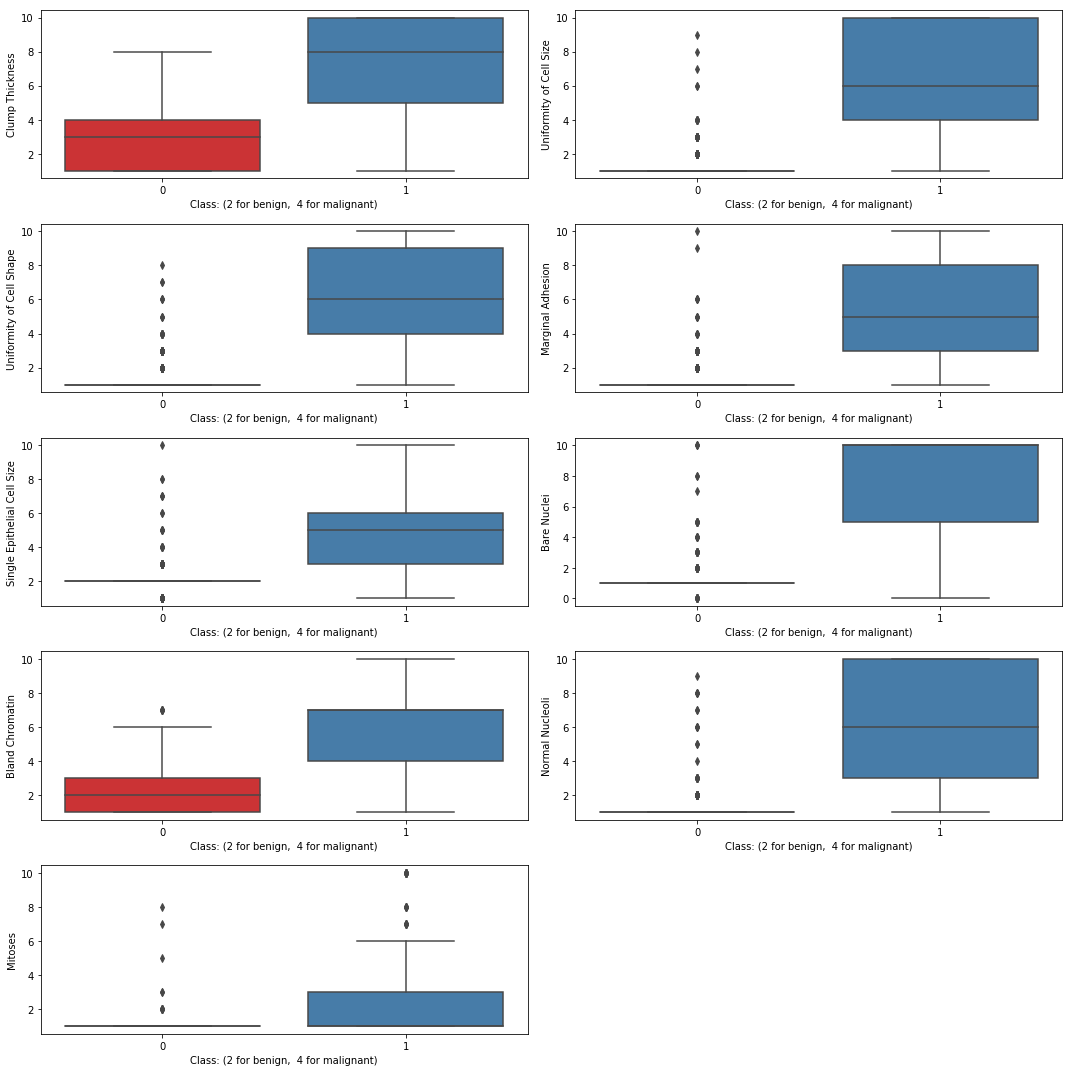

In [66]:
features1= list(df.columns[1:10])

plt.figure(figsize=(15,15))
for i, feature in enumerate(features1):
    rows = int(len(features1)/2)
    
    plt.subplot(rows+1, 2, i+1)
    
    sns.boxplot(x='Class: (2 for benign,  4 for malignant)', y=feature, data=df, palette="Set1")

plt.tight_layout()
plt.show()

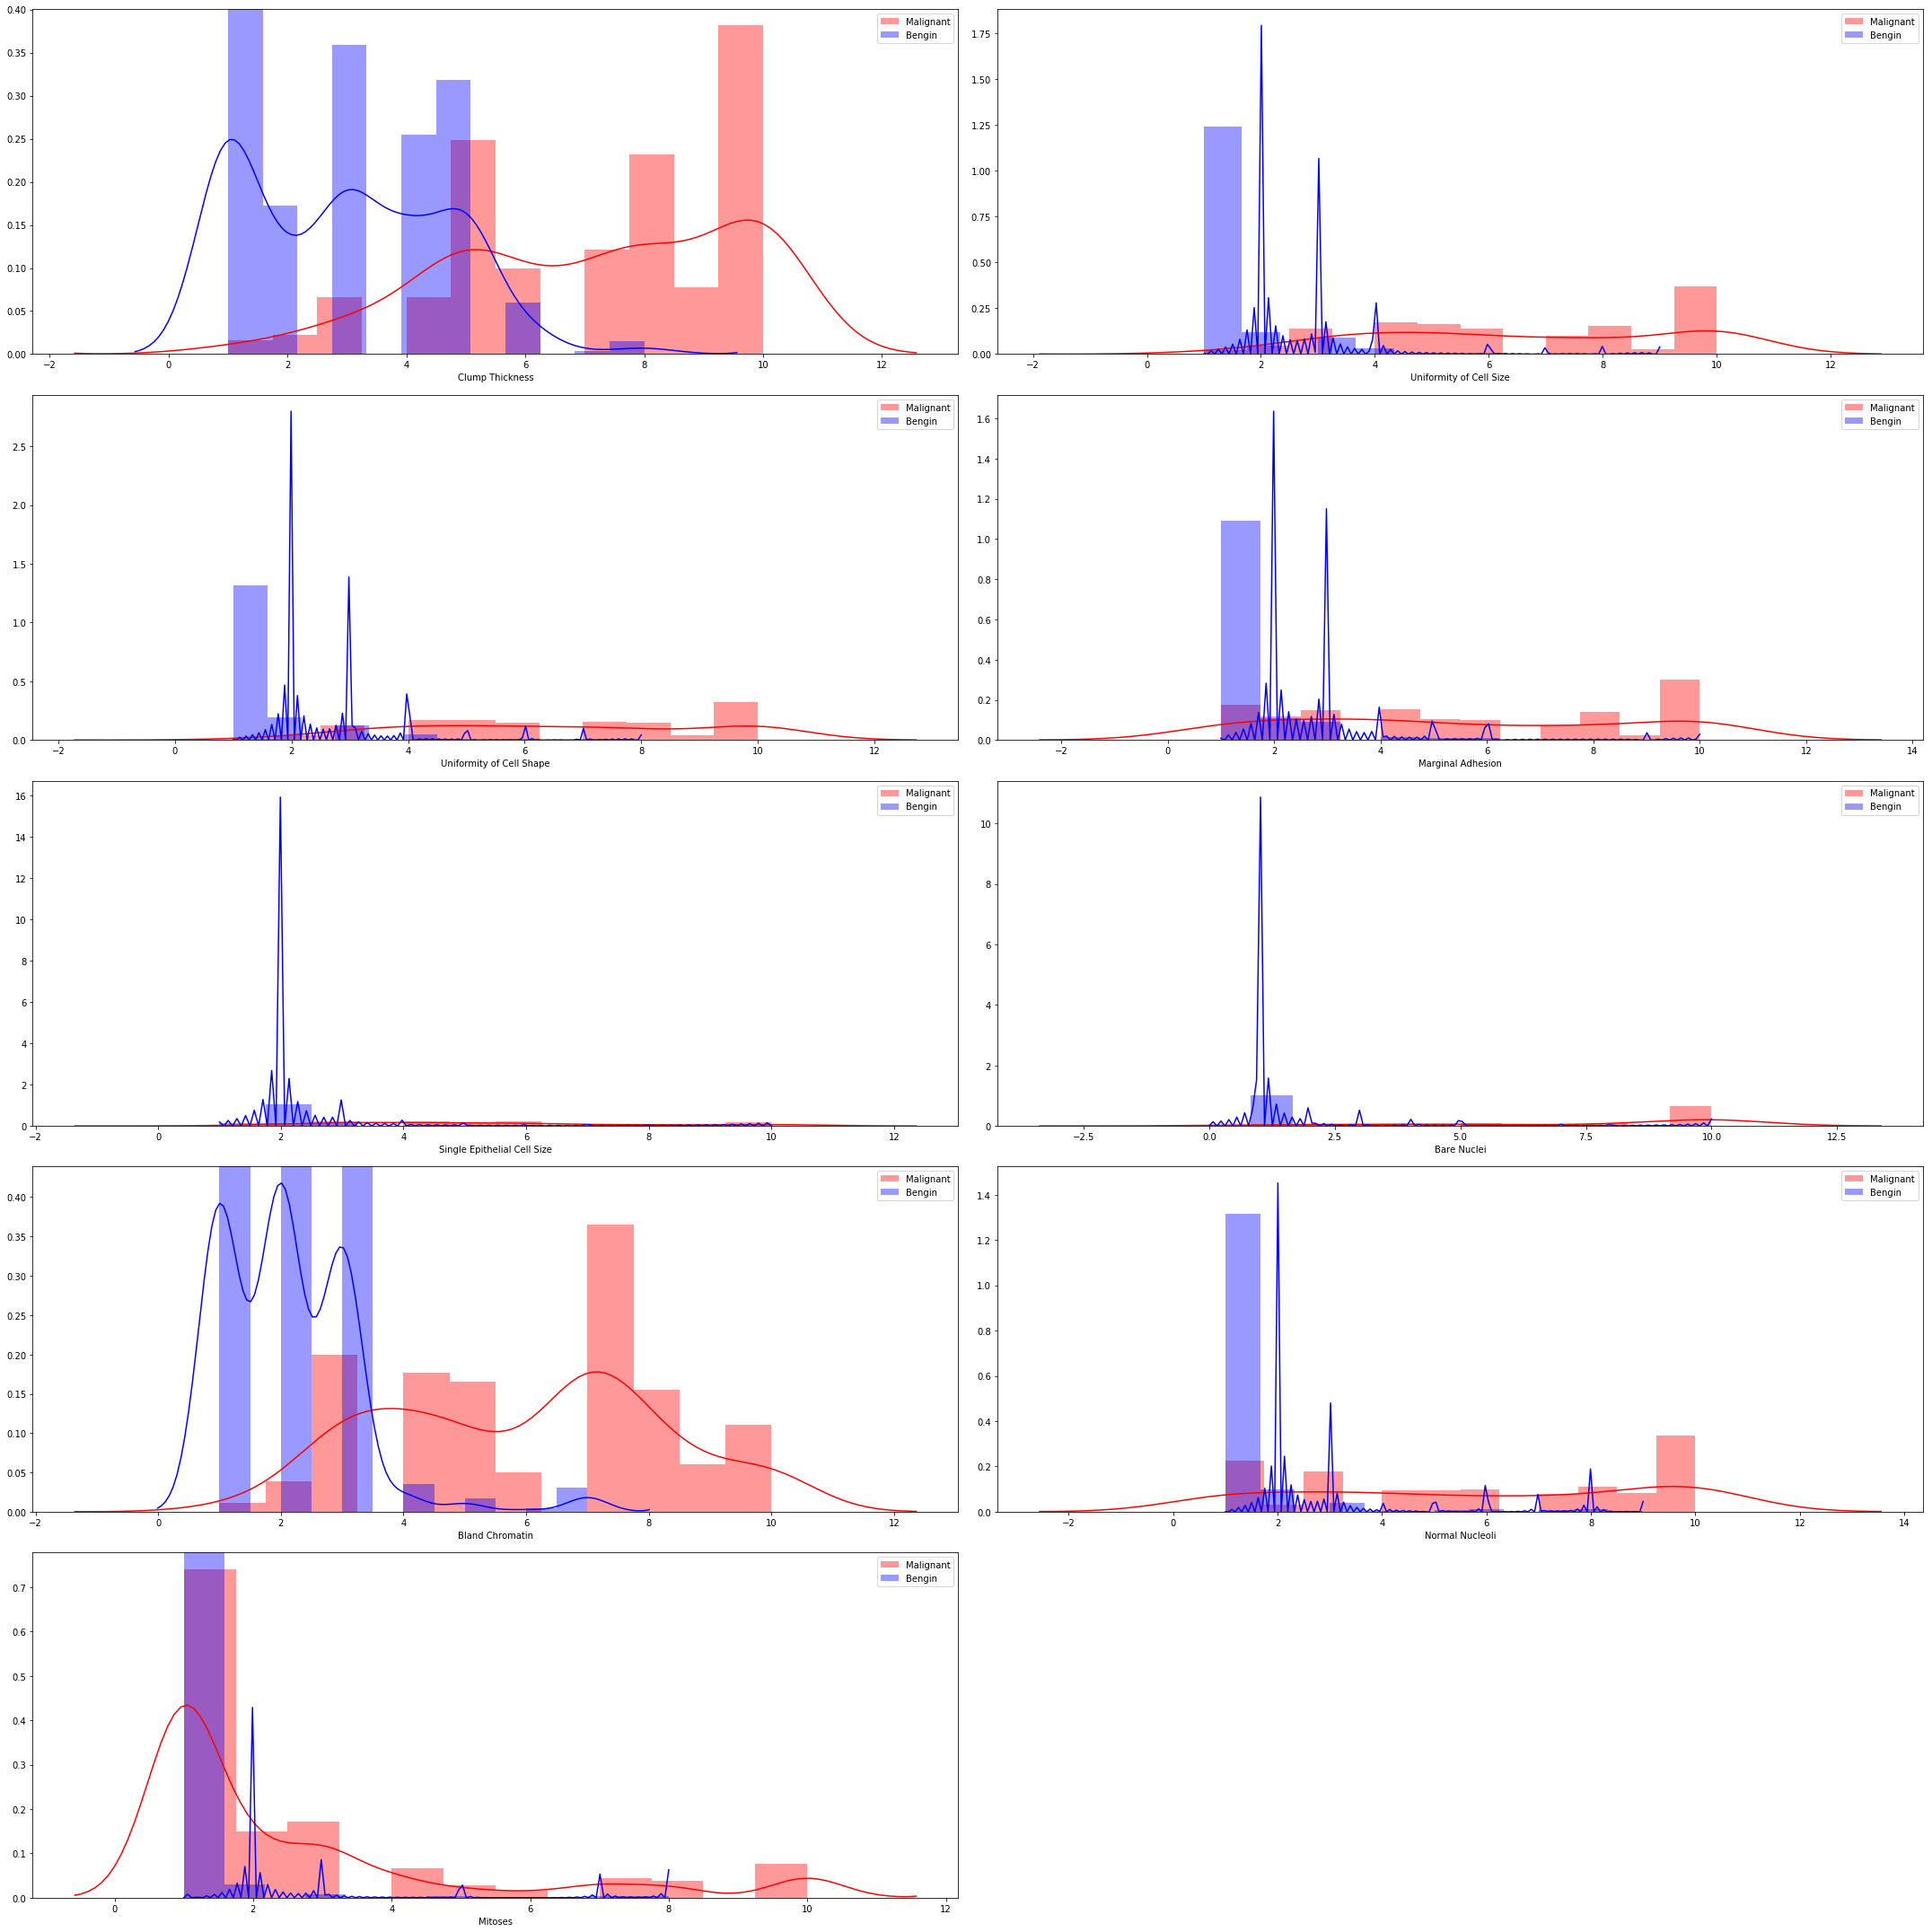

In [79]:
bins = 12
plt.figure(figsize=(30,30))
for i, feature in enumerate(features1):
    rows = int(len(features1)/2)
    
    plt.subplot(rows+1, 2, i+1)
    
    sns.distplot(df[df['Class: (2 for benign,  4 for malignant)']==1][feature], bins=bins, color='red', label='Malignant');
    sns.distplot(df[df['Class: (2 for benign,  4 for malignant)']==0][feature], bins=bins, color='blue', label='Bengin');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

/home/sharwan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


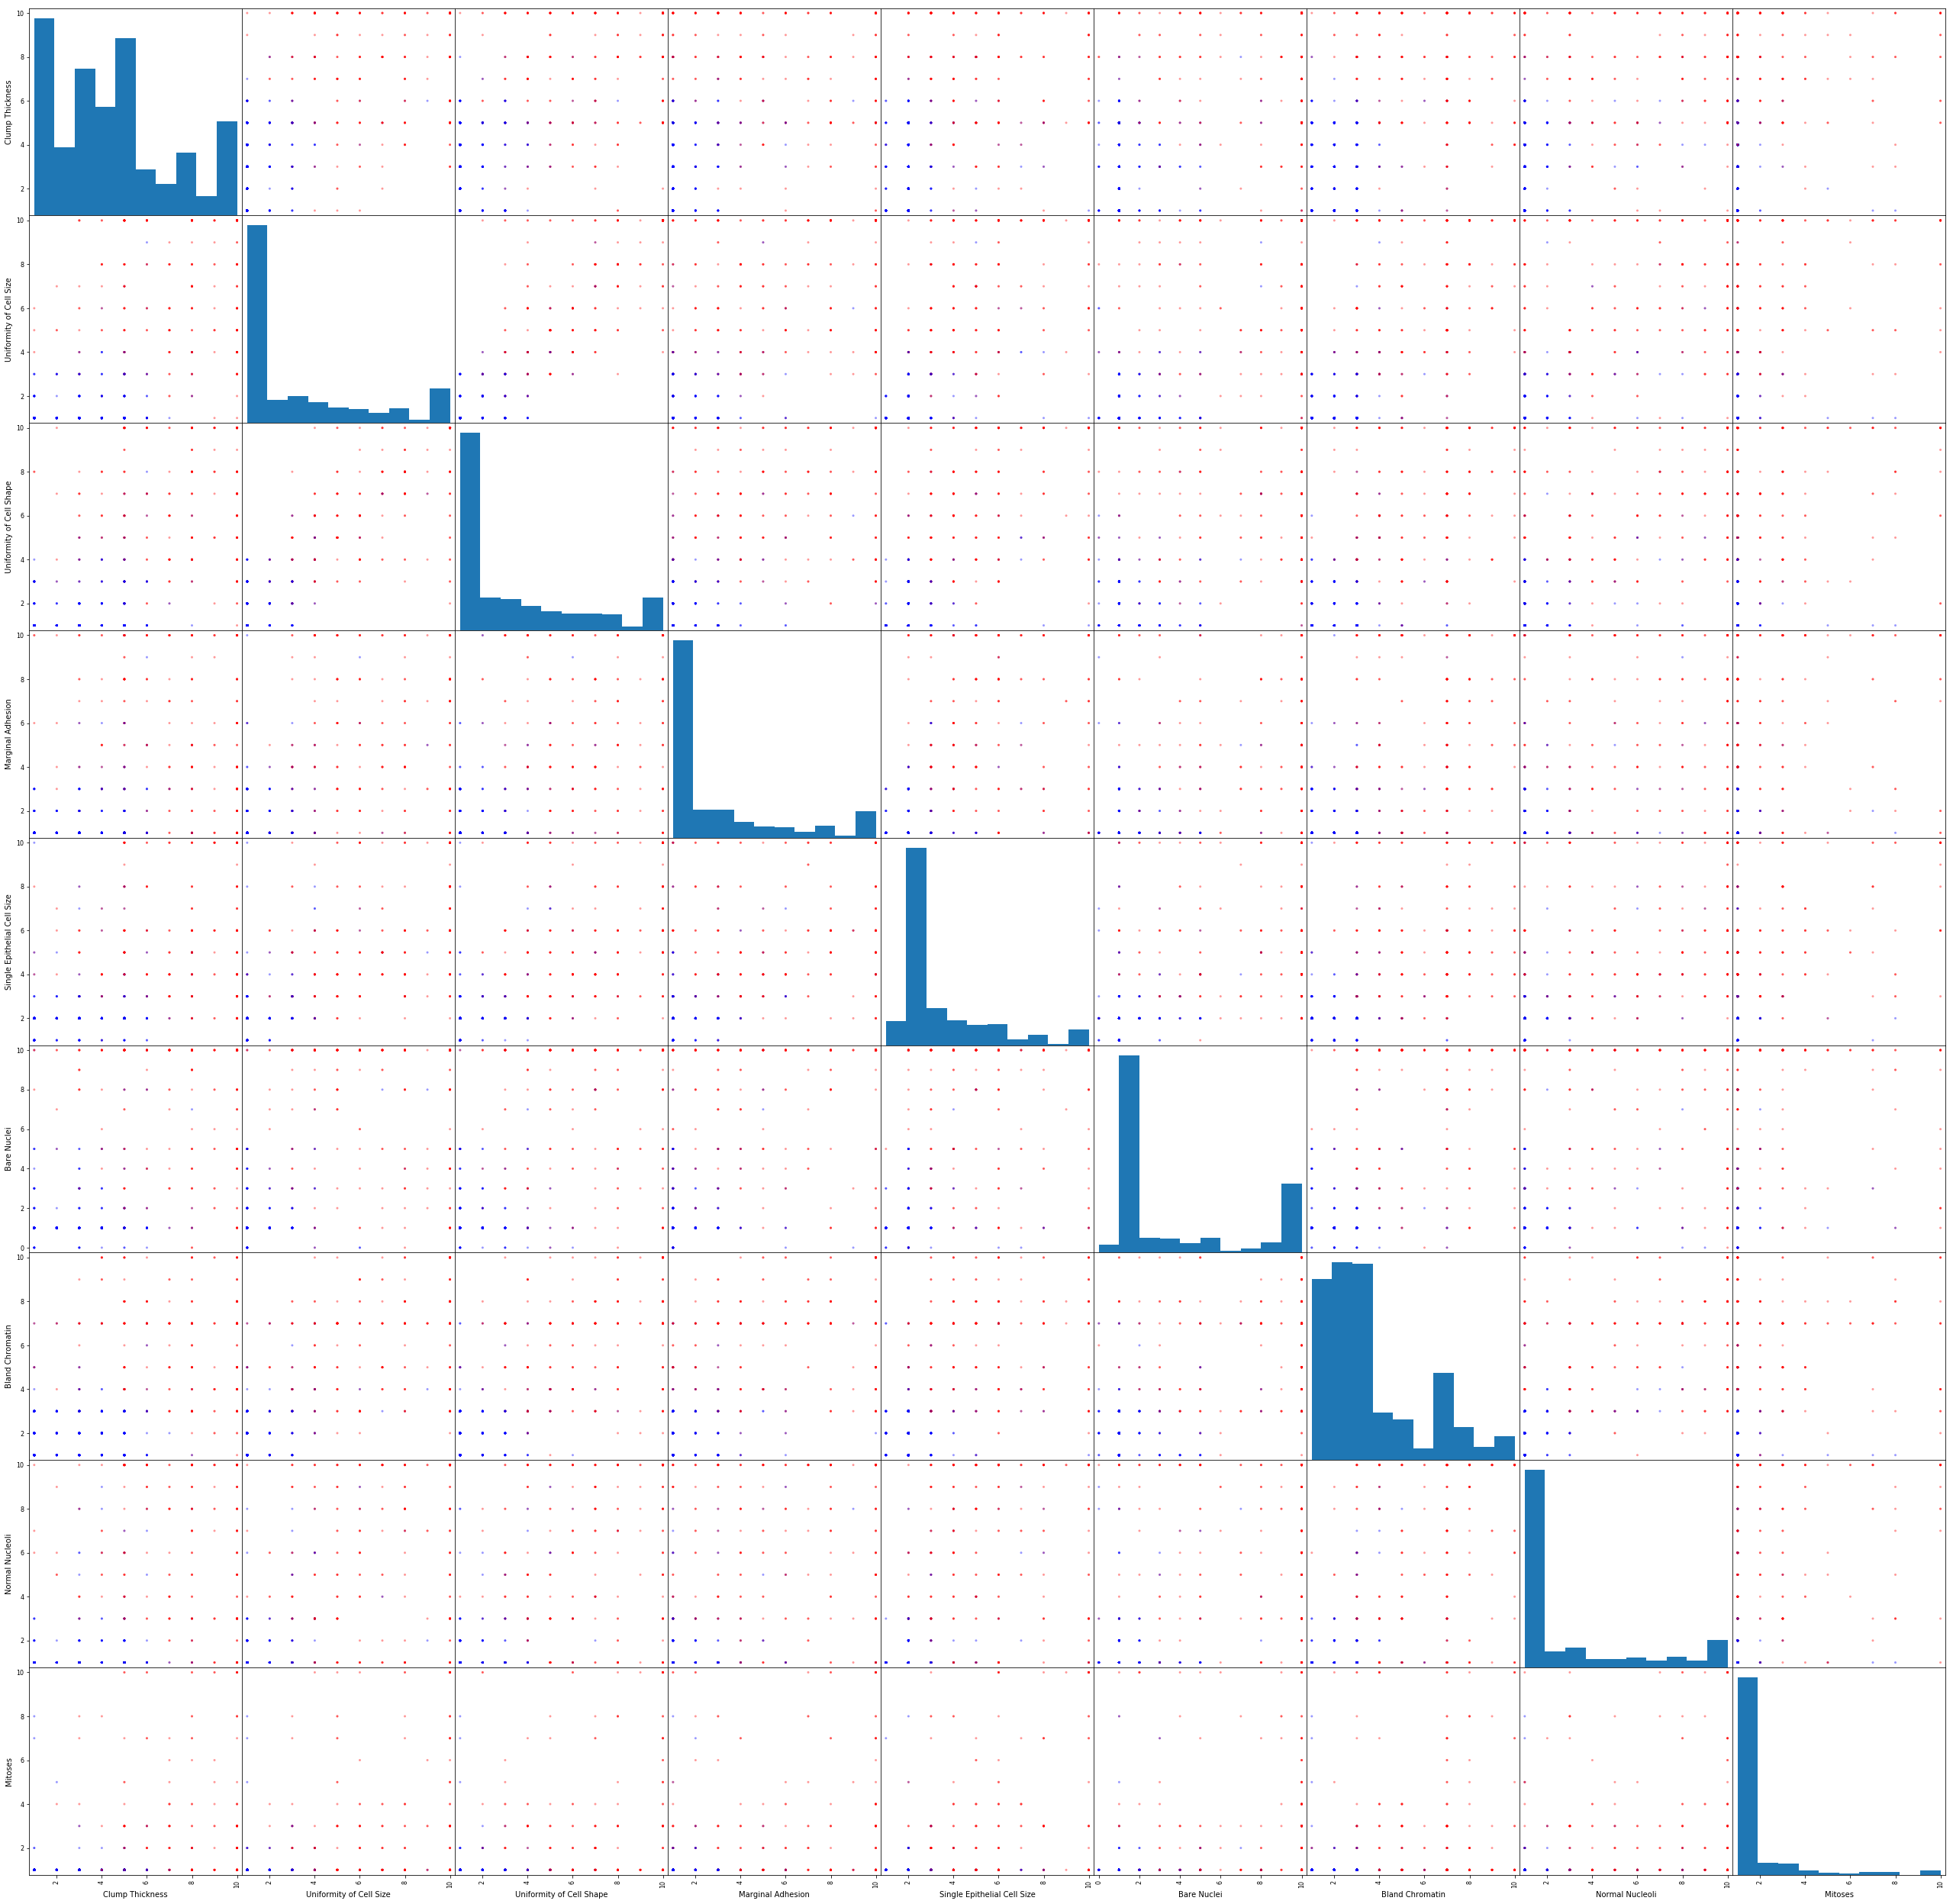

In [74]:
color_dic = {1:'red', 0:'blue'}
colors = df['Class: (2 for benign,  4 for malignant)'].map(lambda x: color_dic.get(x))

sm = pd.scatter_matrix(df[features1], c=colors, alpha=0.4, figsize=((45,45)));

plt.show()

We can see how different feature effect the cancer type.

# Machine Learning

In this section we will apply the machine learning algorithams for classification in ordeer to find tumor is bengin or maligant using the sci-kit learn package. We will load package according to our need. 

In [100]:
#splitting into test and trainig dataset 20:80 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [101]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

/home/sharwan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


We will follow following step for Machine Learning algorithm:
1. the classifier is initialized
2. the classifier is fitted with the train data set X_train and y_train
3. the predictions are found using X_test
4. find confusion matrix and note no. of false positive and false negative 
5. find F1 score 

From above scatter plot matrix we can find that most of the blue point are one side and red point are on other side. So, we easily can make a line between them which seprate both of the classes. So, here best fitted algoritham will be Support vector machine. 

# kernel SVM

In [113]:
classifier2 = SVC(kernel='rbf',random_state=0) 
classifier2.fit(X_train, y_train)

y_pred3 = classifier2.predict(X_test)

cm3 = confusion_matrix(y_test, y_pred3)
f13 = f1_score(y_test, y_pred3)

print(cm3)
print(f13)

[[127   8]
 [  4  71]]
0.9220779220779222


Improving F1 score means reducing false positive and false negative using GridSearchCV

In [115]:
parameters = [{'C': [0.5,1,2,5, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [0.05,0.1,0.5,1,2,3,5, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.005,0.01,0.05, 0.1, 0.15, 0.2, 0.3, 0.4]},
             {'C': [0.05,0.1,0.5,1,2,3,5, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.005,0.01,0.05, 0.1, 0.15, 0.2, 0.3, 0.4], 'coef0':[0.005,0.01,0.05, 0.1, 0.15, 0.2, 0.3, 0.4], 'decision_function_shape':['ovo','ovr']}]
grid_search1 = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
import warnings
warnings.filterwarnings("ignore")
grid_search1 = grid_search1.fit(X_train, y_train)
best_f1 = grid_search1.best_score_
best_parameters = grid_search1.best_params_

y_pred2 = grid_search1.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2) 
f12 = f1_score(y_test, y_pred2)

print(best_f1)
print(best_parameters)

print(cm2)
print(f12)

0.9713005013618511
{'C': 0.5, 'coef0': 0.3, 'decision_function_shape': 'ovo', 'gamma': 0.2, 'kernel': 'sigmoid'}
[[128   7]
 [  2  73]]
0.9419354838709678
